In [206]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime, timedelta

In [227]:
# Load in an example site
f = "./data/fire_sites/Harts Pass_swe.csv"
df = pd.read_csv(f, parse_dates=['datetime'])[['datetime', 'SNOTEL:WTEQ_D']].set_index('datetime').rename({"SNOTEL:WTEQ_D":"SWE"}, axis=1)
df.head()

,SWE
datetime,
1982-10-01,0.0
1982-10-02,0.0
1982-10-03,0.0
1982-10-04,0.0
1982-10-05,0.0


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14282 entries, 1982-10-01 to 2021-11-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SWE     14282 non-null  float64
dtypes: float64(1)
memory usage: 223.2 KB


<AxesSubplot:xlabel='datetime'>

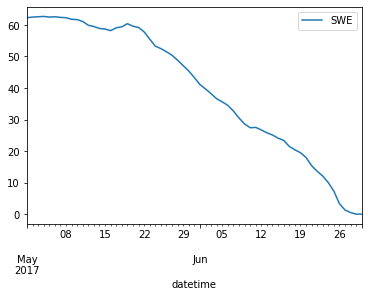

In [229]:
df.loc['2017-May':'2017-Jun'].plot()

In [230]:
df

,SWE
datetime,
1982-10-01,0.0
1982-10-02,0.0
1982-10-03,0.0
1982-10-04,0.0
1982-10-05,0.0
...,...
2021-11-02,4.5
2021-11-03,4.8
2021-11-04,5.0


In [231]:
pd.date_range(df.index[0], df.index[-1], freq='1Y')

DatetimeIndex(['1982-12-31', '1983-12-31', '1984-12-31', '1985-12-31',
               '1986-12-31', '1987-12-31', '1988-12-31', '1989-12-31',
               '1990-12-31', '1991-12-31', '1992-12-31', '1993-12-31',
               '1994-12-31', '1995-12-31', '1996-12-31', '1997-12-31',
               '1998-12-31', '1999-12-31', '2000-12-31', '2001-12-31',
               '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31',
               '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
               '2018-12-31', '2019-12-31', '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [232]:
pd.period_range(df.index[0], df.index[-1], freq="Y")

PeriodIndex(['1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
             '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
             '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
             '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
             '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
            dtype='period[A-DEC]')

In [233]:
def when_did_the_snow_melt(data, swe_name='SWE'):
    """
    Inputs:
    ======
        data: SWE Data for a single water year as a pandas series
    """
    return data.loc[data[swe_name]>0].index[-1].to_pydatetime()

def get_last_day_of_snow(dataset):
    """Creates a list of dataframes split into water years
    """
    mint = df.index[0].to_pydatetime()
    maxt = df.index[-1].to_pydatetime()

    # NOTE: Ignores first year
    water_years = {y.year:df.loc[pd.date_range(f"{y}-01-01", f"{y}-08-15")] for y in pd.period_range(mint, maxt, freq="Y")[1:]}
    
    solution = {
        'water_year': [],
        'last_snow': []
    }
    for water_year in water_years:
        solution['water_year'].append(water_year)
        
        # make it year agnostic
        solution['last_snow'].append(datetime.strptime(when_did_the_snow_melt(water_years[water_year]).strftime("%m-%d"), "%m-%d"))
        
    return pd.DataFrame(solution)

In [234]:
melt_dates = get_last_day_of_snow(df)
melt_dates.head()

,water_year,last_snow
0,1983,1900-06-30
1,1984,1900-07-06
2,1985,1900-06-11
3,1986,1900-06-14
4,1987,1900-06-06


In [235]:
melt_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   water_year  39 non-null     int64         
 1   last_snow   39 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 752.0 bytes


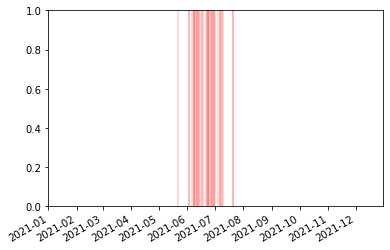

In [238]:
xs = [datetime(2021, melt_date.month, melt_date.day) for melt_date in melt_dates['last_snow']]

fig, ax = plt.subplots()

for x in xs:
    ax.axvline(x, color='red', alpha=0.2)
# ax.set_xlim("2021-01- 01", "2021-12-31")
ax.set_xlim(datetime(2021, 1, 1), datetime(2021, 12, 31))
fig.autofmt_xdate()

<AxesSubplot:xlabel='last_snow'>

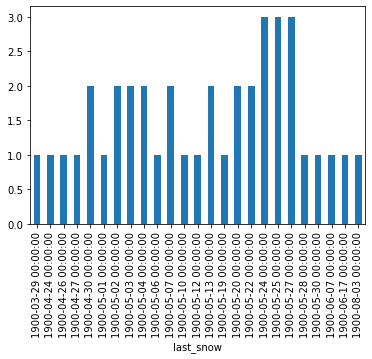

In [205]:
melt_dates['last_snow'].groupby(melt_dates['last_snow']).count().plot(kind='bar')

# All in one cell

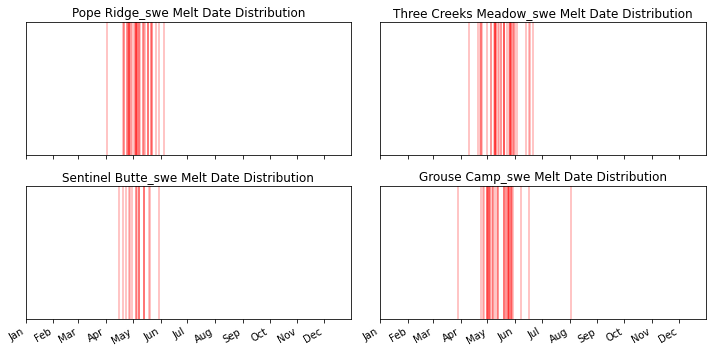

In [281]:
# Load in an example site
fs = [os.path.join("./data/fire_sites", f) for f in os.listdir("./data/fire_sites") if f.endswith('swe.csv')]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5), tight_layout=True)
axes = axes.flatten()

for ax, f in zip(axes, fs):
# f = "./data/fire_sites/Harts Pass_swe.csv"
    df = pd.read_csv(f, parse_dates=['datetime'])[['datetime', 'SNOTEL:WTEQ_D']].set_index('datetime').rename({"SNOTEL:WTEQ_D":"SWE"}, axis=1)
    df.head()

    melt_dates = get_last_day_of_snow(df)
    melt_dates.head()
    
    # # save the datasets as
    # savename = f"./data/fire_sites/{f.split('/')[-1][:-4]}_meltdates.csv"
    # melt_dates.to_csv(savename, index=False)

    xs = [datetime(2021, melt_date.month, melt_date.day) for melt_date in melt_dates['last_snow']]

    for x in xs:
        ax.axvline(x, color='red', alpha=0.3)
    # ax.set_xlim("2021-01- 01", "2021-12-31")
    ax.set_xlim(datetime(2021, 1, 1), datetime(2021, 12, 31))
    fig.autofmt_xdate()

    ax.set_title(f"{f.split('/')[-1][:-4]} Melt Date Distribution")
    ax.set_yticklabels([])
    ax.set_yticks([])

    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))

Looks like most of the assigned melt dates are very realistic, except for 2 data points at Grouse Camp